<a href="https://colab.research.google.com/github/andresarias1105/Metodos1_andresa/blob/main/Copy_of_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import scipy.optimize as spo


In [ ]:
def formato_grafica(ax, fig, titulo= "", x_label= "", y_label= "", leyenda=False, xlim=[None, None], ylim=[None, None]):

    ax.set_title(titulo)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)

    # Utilizarlo si se necesita alguna rotación en los labels de los ejes
#     ax.set_xticklabels(ax.get_xticks(), rotation = 0)
#     ax.set_yticklabels(ax.get_yticks(), rotation = 0)
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])

    # Grid de la gráfica
    ax.grid(True)
    ax.grid(visible=True, which='major', color='grey', linestyle='-')
    ax.minorticks_on()
    ax.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)

    if leyenda == True:
        ax.legend(loc='best', fontsize= 7)

    fig.tight_layout()

# 1)

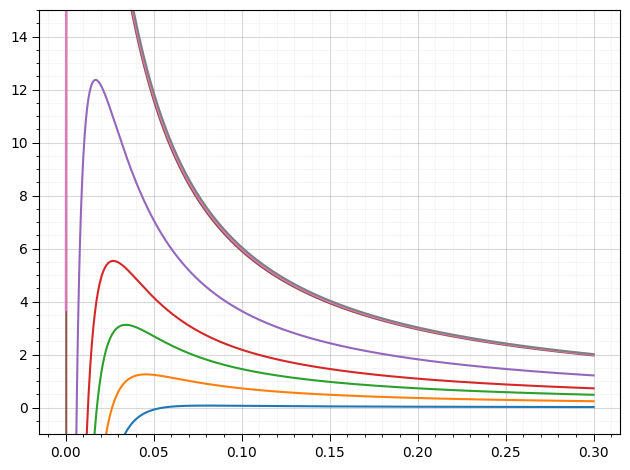

In [ ]:
def V(r,Z,mu):

 g=np.sqrt(1.166e-5*80.4**2*8)

 q=np.sqrt(1/137)




 return  (-(g**2)*np.e**(-mu*r)/r)+(Z*q**2)/r


r_=np.linspace(0.0001,.3,1000)

fig=plt.figure()
ax1=fig.add_subplot()

ax1.plot(r_,V(r_,1,80))
ax1.plot(r_,V(r_,10,80))
ax1.plot(r_,V(r_,20,80))
ax1.plot(r_,V(r_,30,80))
ax1.plot(r_,V(r_,50,80))
ax1.plot(r_,V(r_,81,80))
ax1.plot(r_,V(r_,82,80))
ax1.plot(r_,V(r_,83,80))

formato_grafica(ax1,fig,ylim=[-1,15])

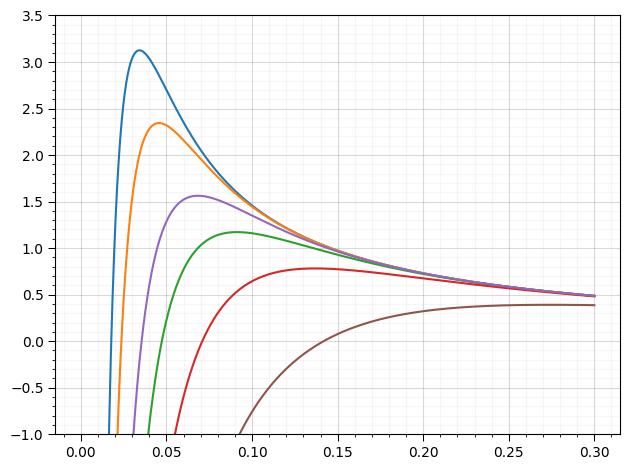

In [ ]:
r_=np.linspace(0.0001,.3,1000)

fig=plt.figure()
ax1=fig.add_subplot()


ax1.plot(r_,V(r_,20,80))
ax1.plot(r_,V(r_,20,60))

ax1.plot(r_,V(r_,20,30))

ax1.plot(r_,V(r_,20,20))

ax1.plot(r_,V(r_,20,40))

ax1.plot(r_,V(r_,20,10))


formato_grafica(ax1,fig,ylim=[-1,3.5])

# 2.

In [ ]:
"""
def f(r,Z,mu):
  return -1*V(r,Z,mu)


max=spo.minimize_scalar(f,bracket=[0,0.05],args=(82,80))
r_max=max.x


r_max"""

g,mu,r,Z,q = sym.symbols("g,mu,r,Z,q")
V_ = -g**2 * (sym.exp(-mu*r)/(r)) + Z*q**2/(r)



r_optimize_ = sym.solve(V_.diff(r),r)
r_optimize_




[(-LambertW(-Z*q**2*exp(-1)/g**2) - 1)/mu]

In [ ]:
from sympy import LambertW
r_optimize = (-LambertW((-Z*q**2)/(sym.exp(1)*g**2),-1) - 1)/mu

g_=np.sqrt(1.166e-5*80.4**2*8) ##Weak coupling constant
mu_=80
q_=np.sqrt(1/137)

for i in range(0,100):
  r_max = r_optimize.subs([[g,g_],[q,q_],[mu,mu_],[Z,i]]).evalf()

  Z_max=sym.solve(V(r_max,Z,80),Z)
  print(i,Z_max)

  r_max= r_optimize.subs([[g,g_],[q,q_],[mu,mu_],[Z,82]]).evalf()

0 []
1 [0.134806933244615]
2 [0.302596623426447]
3 [0.489521714209516]
4 [0.691721180740038]
5 [0.907193375410211]
6 [1.13470135208416]
7 [1.37340835864519]
8 [1.62271727267357]
9 [1.88218774159408]
10 [2.15148872699558]
11 [2.43036923102977]
12 [2.71863920698421]
13 [3.01615656526450]
14 [3.32281802463510]
15 [3.63855249581377]
16 [3.96331619402499]
17 [4.29708896910789]
18 [4.63987151666684]
19 [4.99168324252732]
20 [5.35256062264853]
21 [5.72255594685646]
22 [6.10173636610175]
23 [6.49018318470383]
24 [6.88799135447271]
25 [7.29526913876778]
26 [7.71213792280020]
27 [8.13873215270301]
28 [8.57519939067810]
29 [9.02170047730453]
30 [9.47840979514629]
31 [9.94551563034565]
32 [10.4232206310820]
33 [10.9117423637401]
34 [11.4113139694574]
35 [11.9221849254761]
36 [12.4446219175008]
37 [12.9789098310859]
38 [13.5253528720386]
39 [14.0842758279639]
40 [14.6560254854703]
41 [15.2409722202743]
42 [15.8395117805707]
43 [16.4520672876780]
44 [17.0790914822483]
45 [17.7210692493948]
46 [18.37

El Z mas grande con un maximo real es Z=82

#5

In [ ]:
E=sym.Symbol("E")
V0=V(r_max,Z,mu)

T=sym.Piecewise((1/(1+(V0*sym.sinh(sym.sqrt(V0-E)))**2/(4*E*(V0-E))),E<V0),(1/(1+(V0*sym.sin(sym.sqrt(E-V0)))**2/(4*E*(E-V0))),E>V0))

T

Piecewise((1/(1 + 36349.5334256516*(0.0121053903411727*Z - 1/2.71828182845905**(0.00158132529823055*mu))**2*sinh(19.5271880232532*sqrt(-0.00262253071882894*E + 0.0121053903411727*Z - 1/2.71828182845905**(0.00158132529823055*mu)))**2/(E*(-E + 4.61591936912685*Z - 381.311072095483/2.71828182845905**(0.00158132529823055*mu)))), E < 4.61591936912685*Z - 381.311072095483/2.71828182845905**(0.00158132529823055*mu)), (1/(1 + 36349.5334256516*(0.0121053903411727*Z - 1/2.71828182845905**(0.00158132529823055*mu))**2*sin(19.5271880232532*sqrt(0.00262253071882894*E - 0.0121053903411727*Z + 2.71828182845905**(-0.00158132529823055*mu)))**2/(E*(E - 4.61591936912685*Z + 381.311072095483/2.71828182845905**(0.00158132529823055*mu)))), E > 4.61591936912685*Z - 381.311072095483/2.71828182845905**(0.00158132529823055*mu)))

un poco largo quedo

6